In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

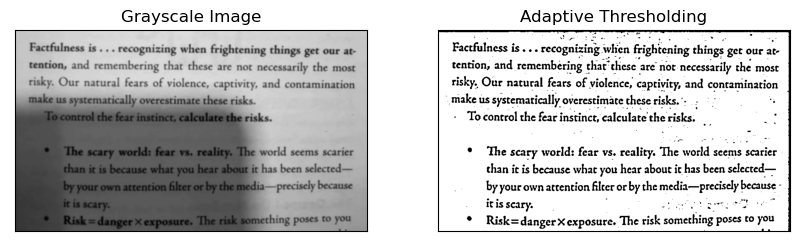

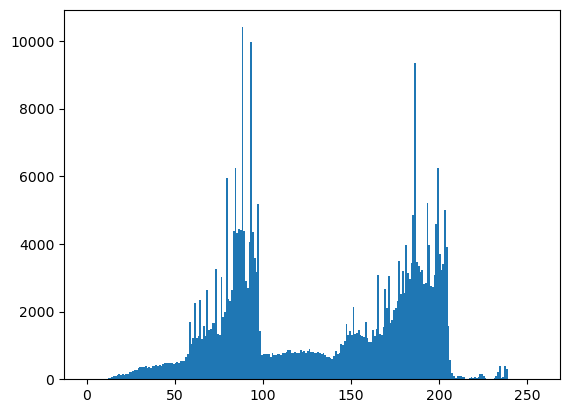

In [23]:
# Read the image
original_img = cv2.imread('scanned.jpg')
# Convert to grayscale
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
# Apply thresholding
th = cv2.adaptiveThreshold(gray_img, 
    255,  # maximum value assigned to pixel values exceeding the threshold
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # gaussian weighted sum of neighborhood
    cv2.THRESH_BINARY,  # thresholding type
    11,  # block size (5x5 window)
    2)  # constant

# Display the images
plt.figure(figsize=(10, 10))

plt.subplot(121), plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(th, cmap='gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])
plt.show()
plt.hist(gray_img.ravel(), 256, [0,256])
plt.show()

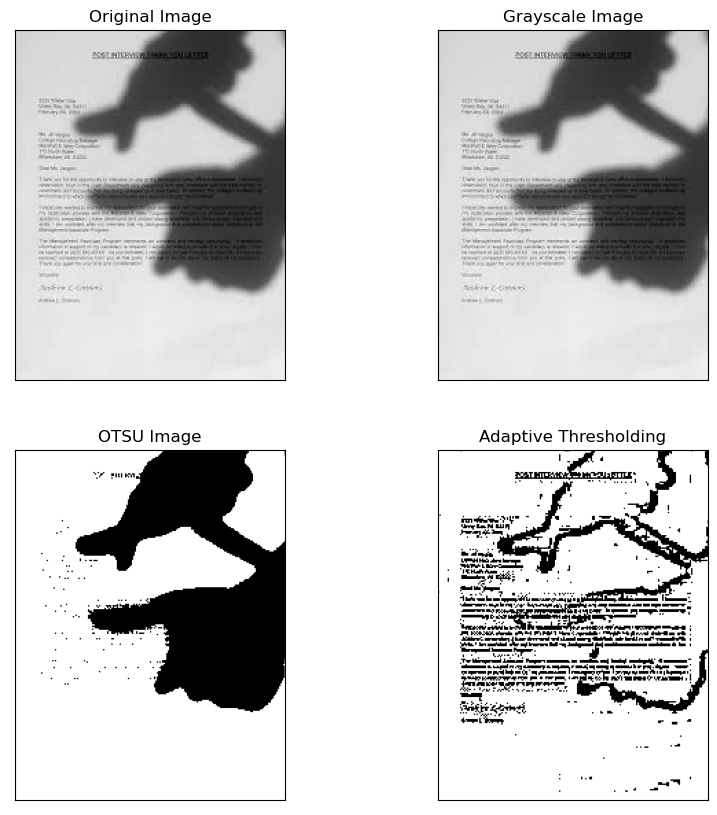

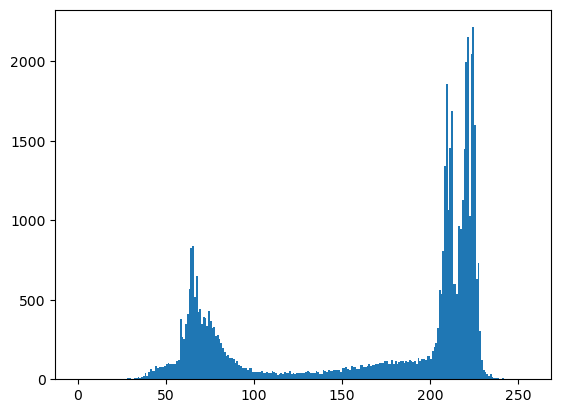

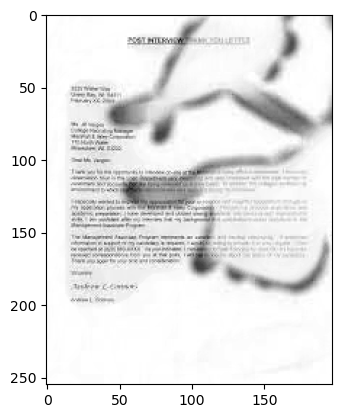

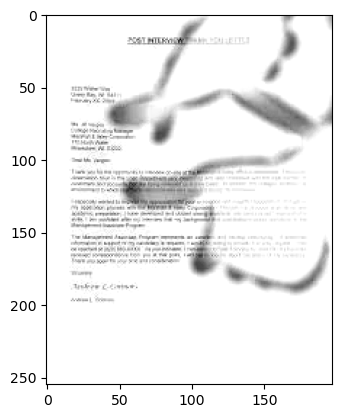

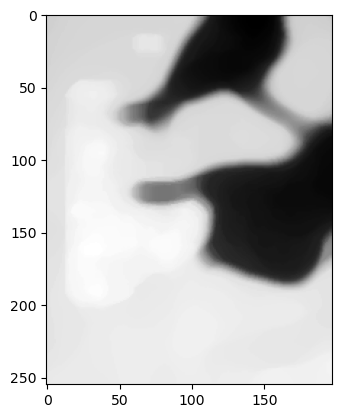

In [15]:
# Read the image
original_img = cv2.imread('scanned.jpeg', 0)
# Dilate the image to increase the size of the foreground objects
kernel = np.ones((7, 7), np.uint8)
dilated_img = cv2.dilate(original_img, kernel, iterations=1)
# Apply median blur to reduce noise
dilated_img = cv2.medianBlur(dilated_img, 21)
# Get the difference between the original image and the median blurred image
diff_img = 255 - cv2.absdiff(original_img, dilated_img)
# Apply thresholding
th = cv2.adaptiveThreshold(original_img, 
    255,  # maximum value assigned to pixel values exceeding the threshold
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # gaussian weighted sum of neighborhood
    cv2.THRESH_BINARY,  # thresholding type
    11,  # block size (5x5 window)
    2)  # constant
ret, thresh_img = cv2.threshold(original_img,
    0,  # threshold value, ignored when using cv2.THRESH_OTSU
    255,  # maximum value assigned to pixel values exceeding the threshold
    cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # thresholding type
# Display the images
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(original_img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(original_img, cmap='gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(thresh_img, cmap='gray')
plt.title('OTSU Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(th, cmap='gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])
plt.show()
plt.hist(original_img.ravel(), 256, [0,256])
plt.show()
plt.imshow(diff_img, cmap='gray')
plt.show()
norm_img = diff_img.copy() # Needed for 3.x compatibility
cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
_, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
plt.imshow(thr_img, cmap='gray')
plt.show()
plt.imshow(dilated_img, cmap='gray')
plt.show()

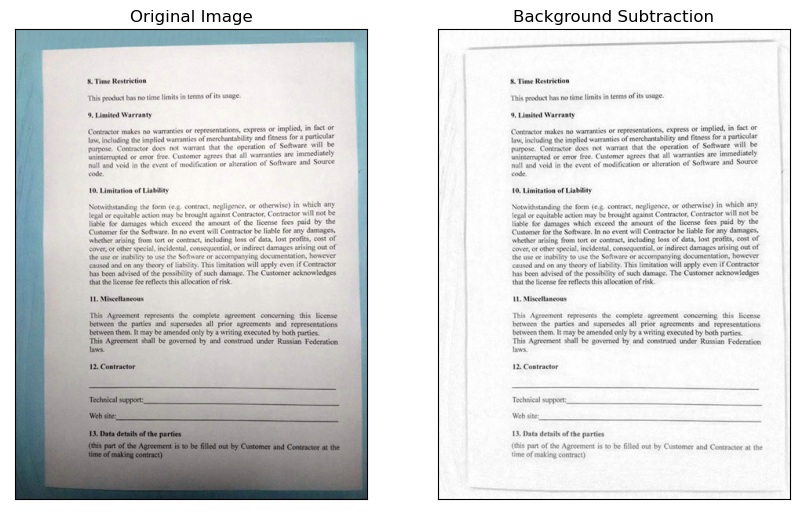

In [25]:
img = cv2.imread('scanned1.jpg')
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
gray = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.title('Background Subtraction'), plt.xticks([]), plt.yticks([])
plt.show()

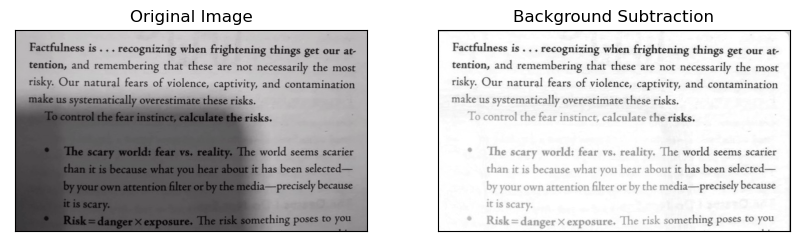

In [26]:
img = cv2.imread('scanned.jpg')
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)
gray = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.title('Background Subtraction'), plt.xticks([]), plt.yticks([])
plt.show()